#◢ Bringing Old Photos Back to Life

This is a reference implementation of our CVPR 2020 paper [1], which  revives an old photo to modern style. Should you be making use of our work, please cite our paper [1].



---


#◢ Verify Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone


In [1]:
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Клонирование в «photo_restoration»…
remote: Enumerating objects: 498, done.
remote: Total 498 (delta 0), reused 0 (delta 0), pack-reused 498
Получение объектов: 100% (498/498), 40.90 МиБ | 987.00 КиБ/с, готово.
Определение изменений: 100% (222/222), готово.


#◢ Set up the environment


In [2]:
# pull the syncBN repo
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd Face_Enhancement/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Face_Enhancement/checkpoints.zip
!unzip checkpoints.zip
%cd ../

%cd Global/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Global/checkpoints.zip
!unzip checkpoints.zip
%cd ../

/home/konstantin/Projects/Diploma/photo_restoration/Face_Enhancement/models/networks
Клонирование в «Synchronized-BatchNorm-PyTorch»…
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Получение объектов: 100% (188/188), 47.20 КиБ | 779.00 КиБ/с, готово.
Определение изменений: 100% (106/106), готово.
/home/konstantin/Projects/Diploma/photo_restoration
/home/konstantin/Projects/Diploma/photo_restoration/Global/detection_models
Клонирование в «Synchronized-BatchNorm-PyTorch»…
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Получение объектов: 100% (188/188), 47.20 КиБ | 619.00 КиБ/с, готово.
Определение изменений: 100% (106/106), готово.
/home/konstantin/Projects/Diploma/photo_restorati

In [3]:
%cd /home/konstantin/Projects/Diploma/photo_restoration/

/home/konstantin/Projects/Diploma/photo_restoration


In [5]:
! pip3 install opencv-python


  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)


In [6]:
! pip install -r requirements.txt

  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached scikit_image-0.19.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Using cached PyYAML-6.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (661 kB)
  Using cached dominate-2.6.0-py2.py3-none-any.whl (29 kB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached tensorboardX-2.5-py2.py3-none-any.whl (125 kB)
  Using cached networkx-2.8.2-py3-none-any.whl (2.0 MB)
  Using cached tifffile-2022.5.4-py3-none-any.whl (195 kB)
  Using cached PyWavelets-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.9 MB)
  Using cached imageio-2.19.2-py3-none-any.whl (3.4 MB)
  Using cached protobuf-3.20.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]


#◢ Run the code

In [9]:
# os.mkdir('/home/konstantin/Projects/Diploma/photo_restoration/output/stage_1_restore_output/restored_image/')

### Restore photos (normal mode)

In [7]:
%cd /home/konstantin/Projects/Diploma/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
#os.mkdir(output_path)

!python run.py --input_folder /home/konstantin/Projects/Diploma/photo_restoration/test_images/old/ --output_folder /home/konstantin/Projects/Diploma/photo_restoration/output/ --GPU 0

/home/konstantin/Projects/Diploma/photo_restoration
Running Stage 1: Overall restoration
/home/konstantin/Projects/Diploma/photo_restoration/Global/test.py:18: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  def data_transforms(img, method=Image.BILINEAR, scale=False):
Traceback (most recent call last):
  File "/home/konstantin/Projects/Diploma/photo_restoration/Global/test.py", line 97, in <module>
    opt = TestOptions().parse(save=False)
  File "/home/konstantin/Projects/Diploma/photo_restoration/Global/options/base_options.py", line 354, in parse
    torch.cuda.set_device(self.opt.gpu_ids[0])
  File "/home/konstantin/miniforge3/lib/python3.9/site-packages/torch/cuda/__init__.py", line 313, in set_device
    torch._C._cuda_setDevice(device)
  File "/home/konstantin/miniforge3/lib/python3.9/site-packages/torch/cuda/__init__.py", line 216, in _lazy_init
    torch._C._cuda_init()
RuntimeError: Found no NVIDIA 

In [11]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

In [12]:
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

a.png


FileNotFoundError: [Errno 2] No such file or directory: '/home/konstantin/Projects/Diploma/photo_restoration/output/final_output/a.png'

### Restore the photos with scratches

In [ ]:
!rm -rf /content/photo_restoration/output/*
!python run.py --input_folder /content/photo_restoration/test_images/old_w_scratch/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/old_w_scratch
processing a.png
processing b.png
processing c.png
processing d.png
You are using NL + Res
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
2
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 5 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


a.png


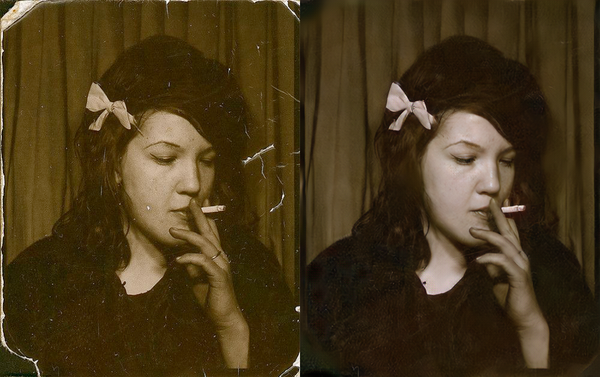

b.png


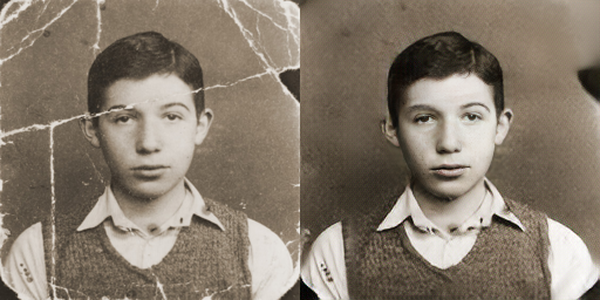

c.png


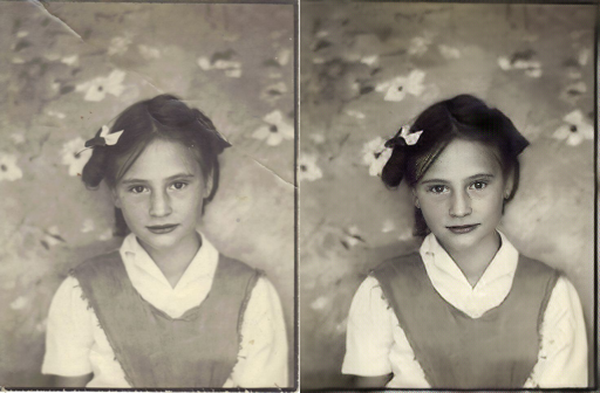

d.png


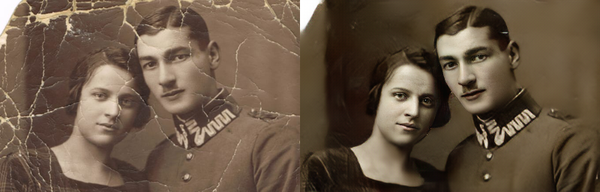

In [ ]:
input_folder = "test_images/old_w_scratch"
output_folder = "output"
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

#◢ Try it on your own photos!

In [ ]:
from google.colab import files
import shutil

upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

Saving 3626857.jpg to 3626857.jpg


Run the processing with:

In [ ]:
!python run.py --input_folder /content/photo_restoration/test_images/upload --output_folder /content/photo_restoration/upload_output --GPU 0 --with_scratch --HR

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/upload
processing 3626857.jpg
Mapping: You are using multi-scale patch attention, conv combine + mask input
Now you are processing 3626857.png
Finish Stage 1 ...


Running Stage 2: Face Detection
2
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 2 was created
The size of the latent vector size is [16,16]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


### Visualize

Now you have all your results under the folder `upload_output` and you can *manually* right click and download them.

Here we use the child photos of celebrities from https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/?utm_source=google&utm_medium=organic&utm_campaign=organic 

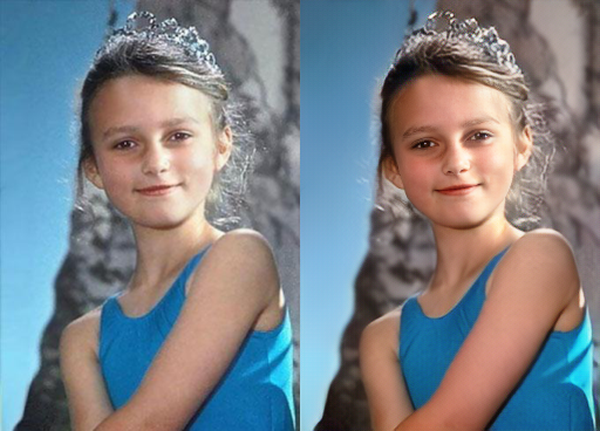

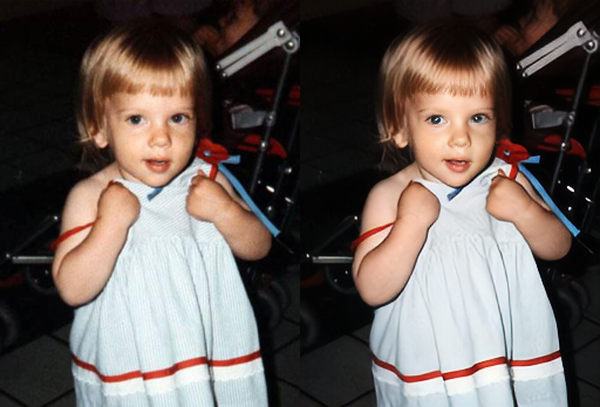

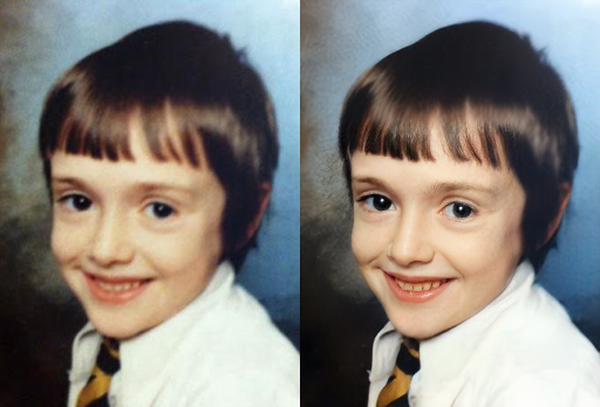

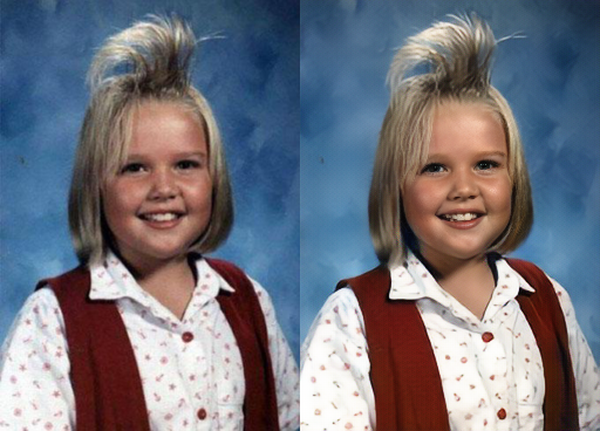

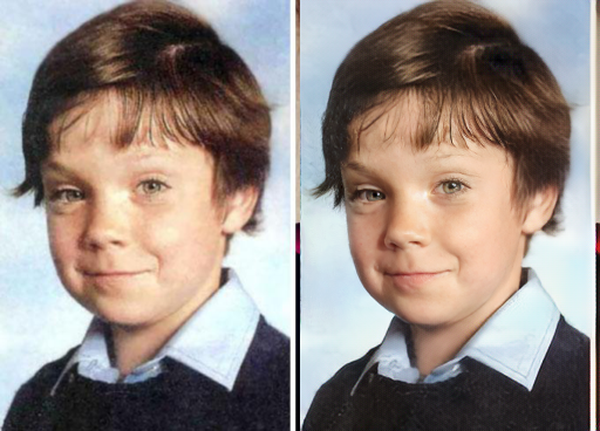

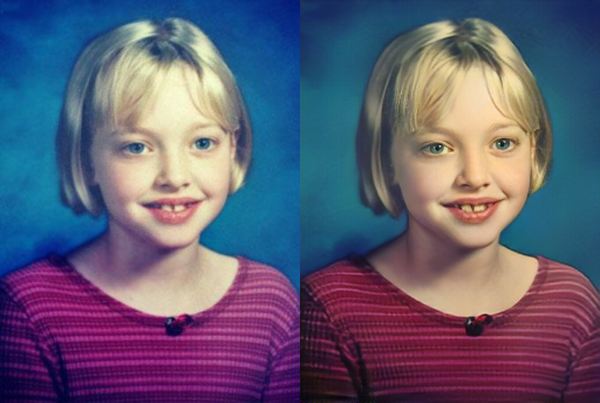

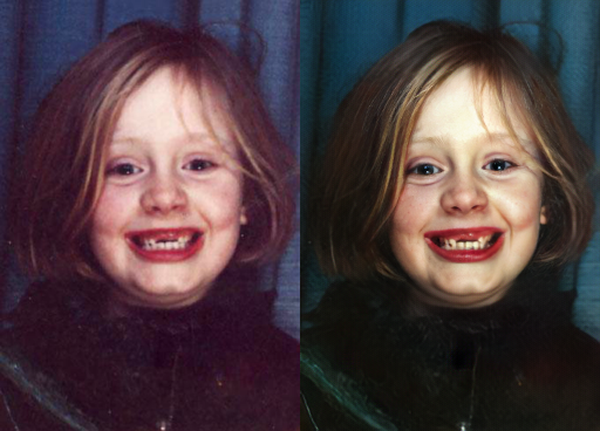

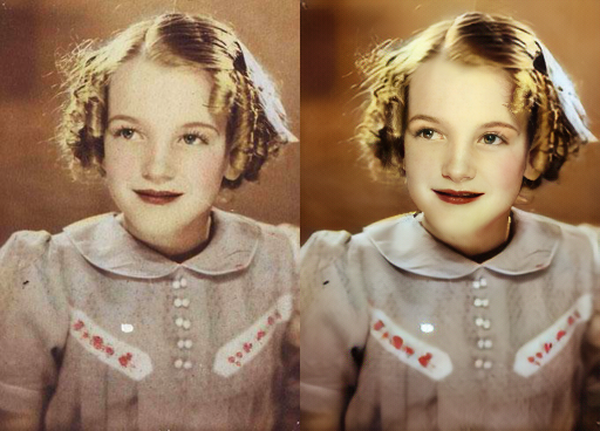

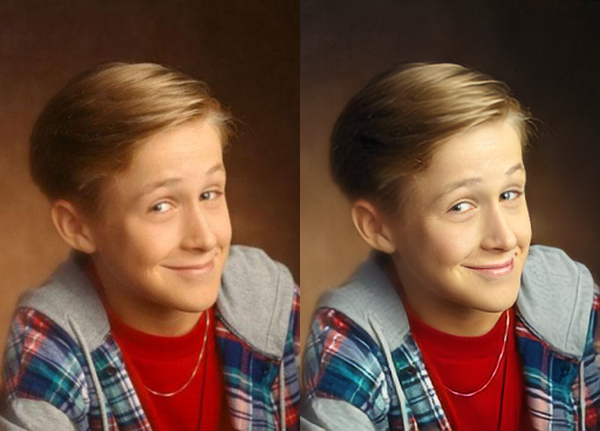

In [ ]:
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "final_output", filename_output))

    display(make_grid(image_original, image_restore))
    print("")

## Download your results



In [ ]:
output_folder = os.path.join(upload_output_path, "final_output")
print(output_folder)
os.system(f"zip -r -j download.zip {output_folder}/*")
files.download("download.zip")

/content/photo_restoration/upload_output/final_output


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>